# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

## Iniciação

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt# Carregando todas as bibliotecas

### Carregue dados

In [54]:
data = pd.read_csv(r'C:\Users\PC\Desktop\portifolio\venda de carros\vehicles_us.csv')# Carregando o arquivo com os dados em um DataFrame



FileNotFoundError: [Errno 2] No such file or directory: '/datasets/vehicles_us.csv'

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [4]:
data.info()#imprmindo informações gerais 
#apesar do metodo describe() ser uma otima opção prefiro iniar minha analise com a visualização forecida pelo metodo info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
data.head(10)# imprima uma amostragem dos dados



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Pré-processamento de dados

Com uma primeira visualização supercifial dos dados é possivel perceber que será necessario realizar um pré procesamento dos mesmo.

identifiquei que as colunas: model_year, cylinders, odometer, paint_color e is_4wd possuem valores ausentes. 

além disso as colunas: model_year, is_4wd, cylinders e data_posted estão com o tipo de dado errado. 

a seguir devemos preencher os valores ausentes e corrigir os dados que estão com o tipo errado.

## Preenchendo os valores ausentes 

Vamos preencher os valores ausentes, começamos trocando os valores ausentes em is_4wd, ao analisar os dados faz sentido pensarmos que os valores ausentes são aqueles diferentes de 1, portanto trocamos todos eles por 0, depois disso agrupamos os carros pelo ano de fabricação e sustituimos os valores ausentes em odometer pela mediana dos quilometros rodados, realizando um processo similar na coluna cylinders onde agrupamos os carros pelo modelo e em seguida substituimos os valores ausentes tambem pela mediana.  

In [7]:
data['is_4wd'] = data['is_4wd'].fillna(0) #substituindo os valores ausentes na coluna is_4wd por 0 

In [8]:
data['odometer'] = data.groupby('model_year')['odometer'].apply(lambda x: x.fillna(x.median())) #preenchendo a coluna odometer com a mediana de quilometros rodados em carros da mesma idade 


C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [9]:
data['cylinders'] = data.groupby('model')['cylinders'].apply(lambda x: x.fillna(x.median()))#preenchendo a coluna cylinders com a mediana de cilindros em carros do mesmo modelo

Ao terminamos essa primeira parte ainda não concluimos de preencher os dados, entretanto acredito que a cor do veiculo terá baixa relevância nos estudos e aprofudamentos a seguir, portanto excluirei a coluna e os demais valores ausentes.

In [10]:
data = data.drop(columns=['paint_color'])
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47905 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         47905 non-null  int64  
 1   model_year    47905 non-null  float64
 2   model         47905 non-null  object 
 3   condition     47905 non-null  object 
 4   cylinders     47905 non-null  float64
 5   fuel          47905 non-null  object 
 6   odometer      47905 non-null  float64
 7   transmission  47905 non-null  object 
 8   type          47905 non-null  object 
 9   is_4wd        47905 non-null  float64
 10  date_posted   47905 non-null  object 
 11  days_listed   47905 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 4.8+ MB


## Corrija os tipos de dados

Trocando o tipo de dados para melhorar as analises futuras

In [11]:
data = data.astype({'cylinders': int, 'is_4wd': int, 'model_year': int, 'odometer': int})

In [12]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format= '%Y-%m-%d')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47905 entries, 0 to 51524
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         47905 non-null  int64         
 1   model_year    47905 non-null  int32         
 2   model         47905 non-null  object        
 3   condition     47905 non-null  object        
 4   cylinders     47905 non-null  int32         
 5   fuel          47905 non-null  object        
 6   odometer      47905 non-null  int32         
 7   transmission  47905 non-null  object        
 8   type          47905 non-null  object        
 9   is_4wd        47905 non-null  int32         
 10  date_posted   47905 non-null  datetime64[ns]
 11  days_listed   47905 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(2), object(5)
memory usage: 4.0+ MB


## Enriqueça os dados

adicinando mais metricas ao dataframe, trazendo mais dados, como a idade do carro quando foi anunciado, quilometragem media por ano e trocando os valores categoricos em condition, para dados numericos 

In [14]:
data['year_posted']=data['date_posted'].dt.year
data['day_posted']=data['date_posted'].dt.day# Adicione valores data/hora para quando a propaganda estiver colocada
data['month_posted']=data['date_posted'].dt.month

In [15]:
data['car_age']=data['year_posted']-data['model_year']# Adicione a idade do veículo quando a propaganda for colocada



In [16]:
data['mean_odometer']=data['odometer']//data['car_age']# Adicione a quilometragem média por ano



In [17]:
data['condition'] = data['condition'].replace({'new':5, 'like new': 4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0})# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente



## Verifique os dados limpos

In [18]:
data.describe()# imprima as informações gerais/resumidas sobre o DataFrame



,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,day_posted,month_posted,car_age,mean_odometer
count,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47905.000000,47903.0
mean,12160.343304,2009.752155,2.638618,6.121804,115054.106085,0.496065,39.564430,2018.307442,15.461267,6.632794,8.555287,inf
std,10082.523707,6.271287,0.711840,1.656815,62320.410022,0.499990,28.202122,0.461439,8.736697,3.475993,6.284593,NaN
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000,0.000000,0.0
25%,5000.000000,2006.000000,2.000000,4.000000,73000.000000,0.000000,19.000000,2018.000000,8.000000,3.000000,4.000000,11090.0
50%,9000.000000,2011.000000,3.000000,6.000000,113884.000000,0.000000,33.000000,2018.000000,15.000000,7.000000,7.000000,15541.0
75%,16900.000000,2014.000000,3.000000,8.000000,153000.000000,1.000000,53.000000,2019.000000,23.000000,10.000000,12.000000,22459.5
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,2019.000000,31.000000,12.000000,110.000000,inf


In [19]:
data.head(10)# imprima uma amostragem dos dados



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,is_4wd,date_posted,days_listed,year_posted,day_posted,month_posted,car_age,mean_odometer
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,1,2018-06-23,19,2018,23,6,7,20714.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,0,2019-02-07,79,2019,7,2,6,18333.0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,0,2019-03-22,9,2019,22,3,16,10087.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,0,2019-04-02,28,2019,2,4,2,40451.0
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,1,2018-06-20,15,2018,20,6,4,14488.0
6,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,0,2018-12-27,73,2018,27,12,3,26404.0
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,1,2019-01-07,68,2019,7,1,6,18245.0
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,1,2018-07-16,19,2018,16,7,6,17362.0
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,1,2019-02-15,17,2019,15,2,11,13381.0
10,19500,2011,chevrolet silverado 1500,3,8,gas,128413,automatic,pickup,1,2018-09-17,38,2018,17,9,7,18344.0


## Estude os parâmetros fundamentais



Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

array([[<Axes: title={'center': 'car_age'}>]], dtype=object)

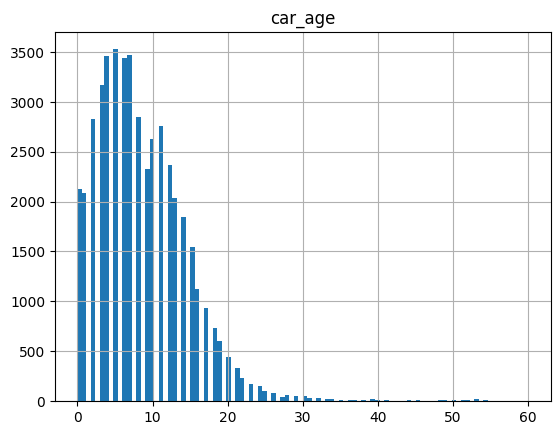

In [20]:
data.hist('car_age', bins= 100, range = (0,60))



array([[<Axes: title={'center': 'odometer'}>]], dtype=object)

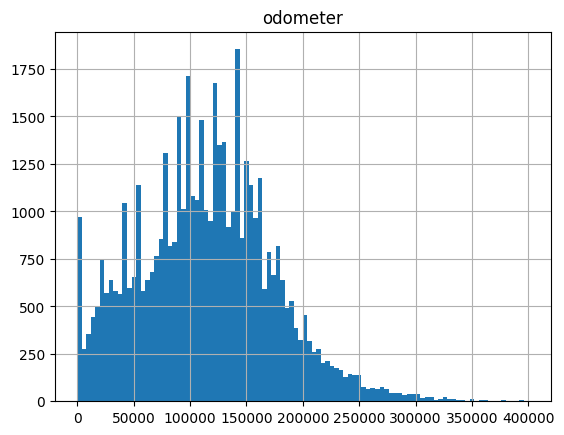

In [21]:
data.hist('odometer', bins= 100, range = (0,400000))


array([[<Axes: title={'center': 'cylinders'}>]], dtype=object)

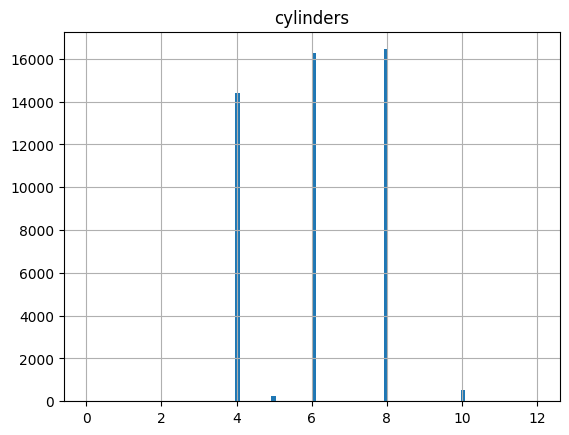

In [22]:
data.hist('cylinders', bins= 100, range = (0, 12))#



array([[<Axes: title={'center': 'condition'}>]], dtype=object)

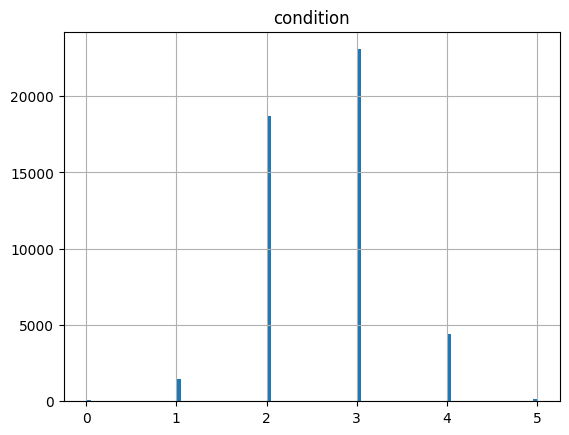

In [23]:
data.hist('condition', bins= 100, range = (0,5 ))



array([[<Axes: title={'center': 'price'}>]], dtype=object)

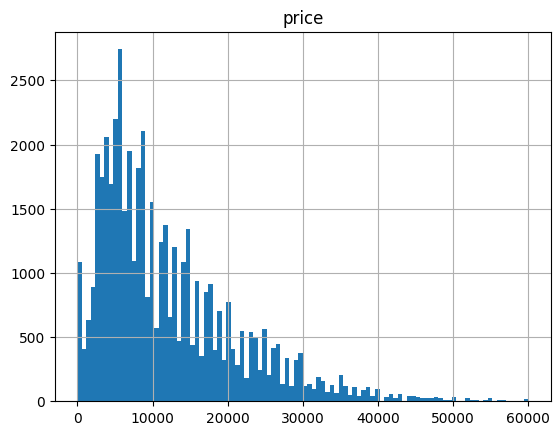

In [24]:
data.hist('price', bins= 100, range = (0,60000))#



## Estude e cuide dos valores ausentes

A seguir vamos definir valores que fogem do comum e alteram a percepção do gráfico, criando uma nova tabela sem esses valores 

In [25]:
min_values =  data.query('cylinders < 4 or condition < 1 or price < 2000 or odometer < 25000')# Determine o limite inferior para valores atípicos
print(min_values)


       price  model_year                         model  condition  cylinders  \
3       1500        2003                    ford f-150          1          8   
13     16500        2018                hyundai sonata          3          4   
64     15999        2017               chevrolet cruze          2          4   
73      1900        1994    jeep grand cherokee laredo          2          6   
78     23800        2019   nissan frontier crew cab sv          2          6   
...      ...         ...                           ...        ...        ...   
51450  16950        2018               subaru forester          3          4   
51489   1200        2005              volkswagen jetta          1          5   
51511  21600        2016  chevrolet camaro lt coupe 2d          2          6   
51512   7300        2013                 nissan altima          3          6   
51521   2700        2002                   honda civic          0          4   

      fuel  odometer transmission    ty

In [26]:
max_values = data.query('cylinders > 8 or condition > 4 or price > 30000 or odometer > 250000')# Determine o limite superior para valores atípicos
print(max_values)


       price  model_year                              model  condition  \
33      3890        2011                     subaru outback          3   
42     34900        2013  mercedes-benz benze sprinter 2500          3   
45      2400        2001                       toyota camry          2   
49      3200        2006                        honda civic          3   
54     30300        2017        ford f150 supercrew cab xlt          2   
...      ...         ...                                ...        ...   
51445   3200        2003               ford f350 super duty          2   
51447  33990        2019                           ram 1500          3   
51449   4500        1995                           ram 3500          3   
51463  35500        2015                  gmc sierra 2500hd          2   
51467  38995        2014                           ram 2500          3   

       cylinders    fuel  odometer transmission    type  is_4wd date_posted  \
33             4     gas    3000

In [27]:
outliers = pd.merge(min_values, max_values, on = None )# Armazene os dados sem os valores atípicos em um DataFrame separado
clean_data = data[~data.isin(outliers)].dropna()

## Estude os parâmetros fundamentais sem valores atípicos

comparando os graficos com dados filtrados e não filtrados para perceber os impactos na alteração do dataFrame.

<Axes: >

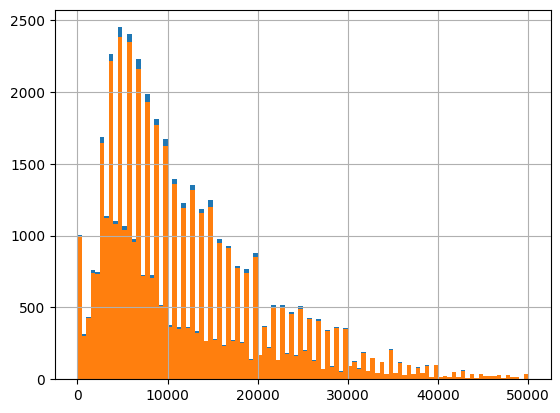

In [28]:
data['price'].hist(bins=100, range=(0,50000))
clean_data['price'].hist(bins=100, range=(0,50000))

<Axes: >

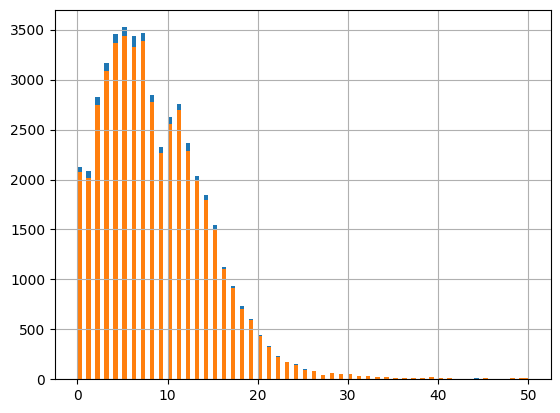

In [29]:
data['car_age'].hist(bins=100, range=(0,50))
clean_data['car_age'].hist(bins=100, range=(0,50))

<Axes: >

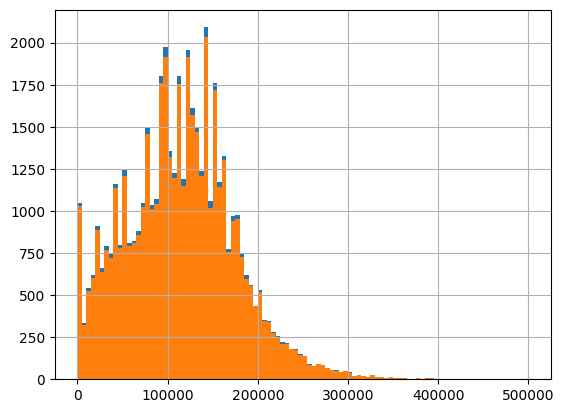

In [30]:
data['odometer'].hist(bins=100, range=(0,500000))
clean_data['odometer'].hist(bins=100, range=(0,500000))

<Axes: >

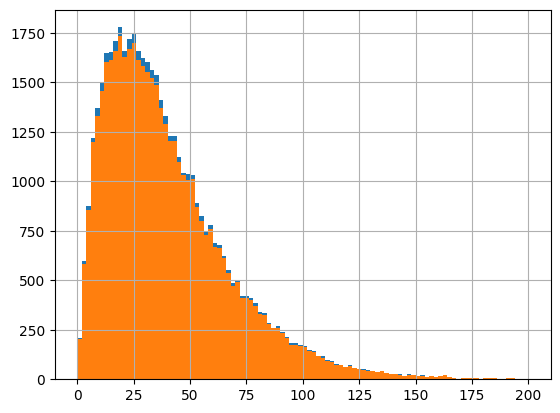

In [31]:
data['days_listed'].hist(bins=100, range=(0,200))
clean_data['days_listed'].hist(bins=100, range=(0,200))

## Tempo de vida das propagandas

vamos estudar o tempo de vida médio e a mediana de cada propaganda 

In [32]:
clean_data['days_listed'].describe()


count    46674.000000
mean        39.579102
std         28.197751
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [33]:
print(clean_data['days_listed'].median())

33.0


## Média de preços por cada tipo de veículo

Analisando o número de propagandas e o preço médio para cada tipo de veículo. Construindo um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. 

In [34]:
clean_data.pivot_table(index = 'type', values = 'price', aggfunc='median')

,price
type,
SUV,8900.0
bus,10500.0
convertible,11999.5
coupe,12900.0
hatchback,5900.0
mini-van,6495.0
offroad,11450.0
other,8800.0
pickup,14447.5


<Axes: >

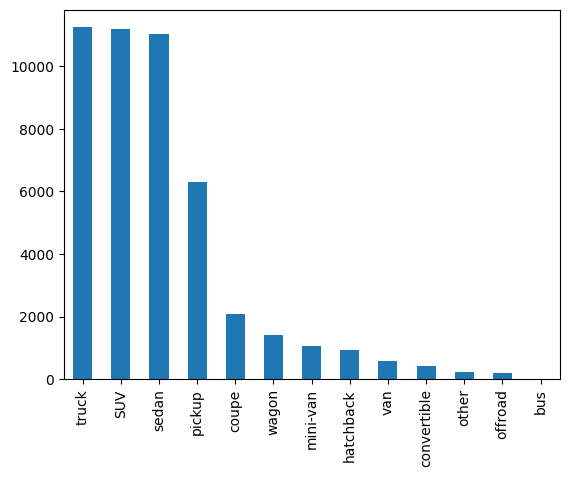

In [35]:
clean_data['type'].value_counts().plot.bar()

## Fatores de preço

Analisando a correlação entre preço e os demais fatores que podem implicar na venda do carro. 

Text(0.5, 1.0, 'Gráfico de Dispersão entre preço e quilometragem')

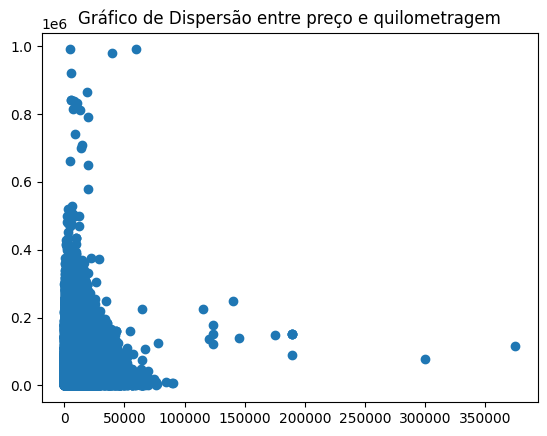

In [36]:
plt.scatter(clean_data['price'], clean_data['odometer'])
plt.title('Gráfico de Dispersão entre preço e quilometragem')

Text(0.5, 1.0, 'Gráfico de Dispersão entre preço e idade')

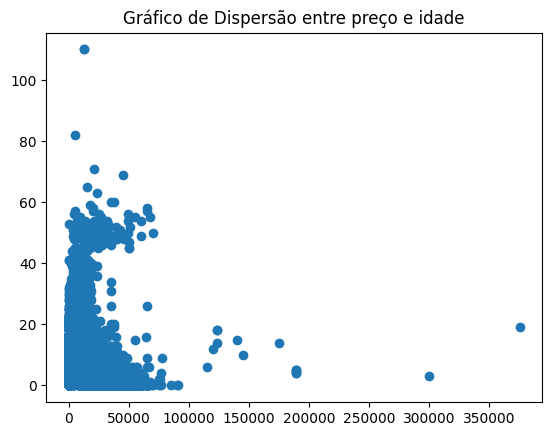

In [37]:
plt.scatter(clean_data['price'], clean_data['car_age'])
plt.title('Gráfico de Dispersão entre preço e idade')


Text(0.5, 1.0, 'Gráfico de Dispersão entre preço e condição')

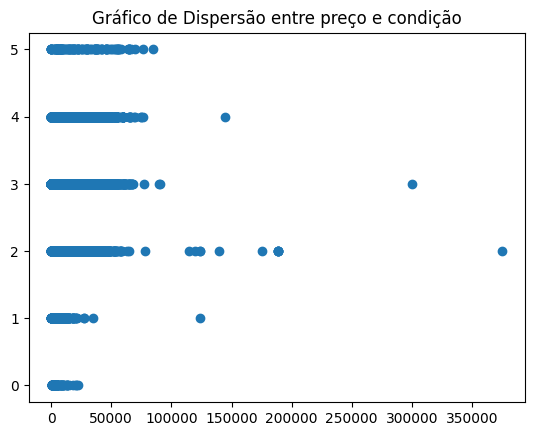

In [38]:
plt.scatter(clean_data['price'], clean_data['condition'])
plt.title('Gráfico de Dispersão entre preço e condição')

(0.0, 50000.0)

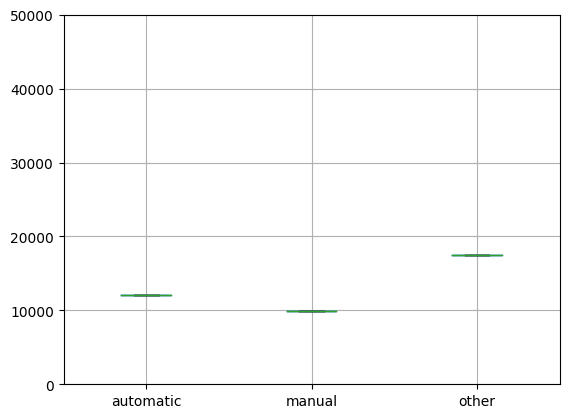

In [47]:
transmission_pivot= clean_data.pivot_table(columns='transmission', values='price', aggfunc='mean')
transmission_pivot.boxplot()
plt.ylim(0,50000)

## Conclusão geral
* Truck, SUV e sedan são os tipos de veículo com o maior numero de propagandas.
* carros com a quilometragem menor tendem a ser mais caros do que aqueles que possuem maior uso.
* assim como seu estado de conservação, quanto melhor a codição do veiculo mais caro ele é. 

